In [1]:
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
q3_ds = pd.read_csv('data/Divvy_Stations_2016_Q3.csv')
q4_ds = pd.read_csv('data/Divvy_Stations_2016_Q4.csv')

ds = pd.concat([q3_ds,q4_ds],axis=0).drop_duplicates(subset=['id'])

ds.head()

,id,name,latitude,longitude,dpcapacity,online_date
0,456,2112 W Peterson Ave,41.991178,-87.683593,15,5/12/2015
1,101,63rd St Beach,41.781016,-87.576120,23,4/20/2015
2,109,900 W Harrison St,41.874675,-87.650019,19,8/6/2013
3,21,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15,6/21/2013
4,80,Aberdeen St & Monroe St,41.880420,-87.655599,19,6/26/2013


# Visualizing Station Data by using Folium

In [3]:
vis = folium.Map([41.8781, -87.6298],zoom_start=11)
vis

In [4]:
#marking each station as a point
for index, row in ds.iterrows():
    folium.CircleMarker([row['latitude'],row['longitude']],radius=1,popup=row['name'],fill_color="#3db7e4").add_to(vis)

In [5]:
#converting to (n,2) nd-array format for heatmap
statArr = ds[['latitude','longitude']].as_matrix()

#plot heatmap
vis.add_children(plugins.HeatMap(statArr,radius=2))
vis

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
H:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


# Loading trips dataset

In [6]:
ds_data = ['data/Divvy_Trips_2016_Q3.csv','data/Divvy_Trips_2016_Q4.csv']

ds_trip = (pd.read_csv(f) for f in ds_data)
dscomb = pd.concat(ds_trip,ignore_index=True)

dscomb.describe(include='all')

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
count,2.125643e+06,2125643,2125643,2.125643e+06,2.125643e+06,2.125643e+06,2125643,2.125643e+06,2125643,2125643,1590189,1.590343e+06
unique,NaN,1846706,1779098,NaN,NaN,NaN,584,NaN,584,3,2,NaN
top,NaN,7/19/2016 21:30:20,7/23/2016 12:54:37,NaN,NaN,NaN,Streeter Dr & Grand Ave,NaN,Streeter Dr & Grand Ave,Subscriber,Male,NaN
freq,NaN,7,17,NaN,NaN,NaN,59247,NaN,64948,1589954,1180122,NaN
mean,1.169926e+07,NaN,NaN,3.251980e+03,1.008547e+03,1.799161e+02,NaN,1.803518e+02,NaN,NaN,NaN,1.980787e+03
std,7.313875e+05,NaN,NaN,1.730437e+03,1.816103e+03,1.305240e+02,NaN,1.304878e+02,NaN,NaN,NaN,1.075399e+01
min,1.042666e+07,NaN,NaN,1.000000e+00,6.000000e+01,2.000000e+00,NaN,2.000000e+00,NaN,NaN,NaN,1.899000e+03
25%,1.106635e+07,NaN,NaN,1.755000e+03,4.160000e+02,7.500000e+01,NaN,7.500000e+01,NaN,NaN,NaN,1.975000e+03
50%,1.170150e+07,NaN,NaN,3.446000e+03,7.160000e+02,1.570000e+02,NaN,1.570000e+02,NaN,NaN,NaN,1.984000e+03
75%,1.233129e+07,NaN,NaN,4.802000e+03,1.195000e+03,2.680000e+02,NaN,2.720000e+02,NaN,NaN,NaN,1.989000e+03


# Determing total count of trips and round trips from station A

In [7]:
#'Dependent' usertype with 40 entries will be dropped
dscomb = dscomb[dscomb.usertype != 'Dependent']

#Determining passengers who commute from station A to station B
totalTrips = len(dscomb)
sameStattrips = dscomb[dscomb.from_station_id == dscomb.to_station_id]
sameStattrips.is_copy = False

totalTrips = len(dscomb)
sameStattrips = dscomb[dscomb.from_station_id == dscomb.to_station_id]
sameStattrips.is_copy = False

print('Total number of trips: {:,}'.format(totalTrips))
print(('Trips from A -> A: {:,}').format(len(sameStattrips)))
print(('Trips from A -> A: {:.1%}').format(len(sameStattrips)/totalTrips))

Total number of trips: 2,125,603
Trips from A -> A: 73,730
Trips from A -> A: 3.5%


H:\Anaconda\lib\site-packages\pandas\core\generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
H:\Anaconda\lib\site-packages\pandas\core\generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


In [8]:
# % of same station trips by different types of user
num_trips_by_usertype = dscomb.groupby('usertype')['trip_id'].agg(len)
num_same_station_trips_by_usertype = sameStattrips.groupby('usertype')['trip_id'].agg(len)
num_same_station_trips_by_usertype / num_trips_by_usertype

usertype
Customer      0.090636
Subscriber    0.015838
Name: trip_id, dtype: float64

# Finding duration of trips

In [9]:
sameStattrips['tripInMinutes'] = sameStattrips['tripduration']/60
sameStattrips.describe()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear,tripInMinutes
count,7.373000e+04,73730.000000,73730.000000,73730.000000,73730.000000,25204.000000,73730.000000
mean,1.151064e+07,3219.399769,2360.523261,192.533473,192.533473,1980.622798,39.342054
std,6.886428e+05,1731.021515,4078.805054,153.248962,153.248962,11.690790,67.980084
min,1.042666e+07,1.000000,60.000000,2.000000,2.000000,1900.000000,1.000000
25%,1.091862e+07,1716.000000,504.000000,69.000000,69.000000,1974.000000,8.400000
50%,1.144692e+07,3395.000000,1383.000000,164.000000,164.000000,1985.000000,23.050000
75%,1.205419e+07,4764.000000,2888.000000,291.000000,291.000000,1989.000000,48.133333
max,1.297922e+07,5919.000000,86365.000000,620.000000,620.000000,2000.000000,1439.416667


# Visualizing trip duration in minutes distribution

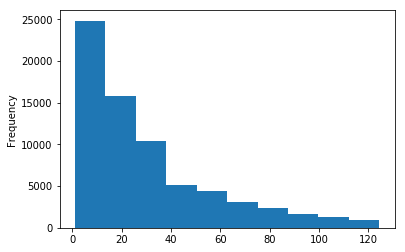

In [10]:
#checking the duration of trip in minutes
tripDur = sameStattrips['tripInMinutes']
tripDur[tripDur < tripDur.quantile(.95)].plot(kind='hist')

usertype
Customer      AxesSubplot(0.125,0.125;0.775x0.755)
Subscriber    AxesSubplot(0.125,0.125;0.775x0.755)
Name: tripInMinutes, dtype: object

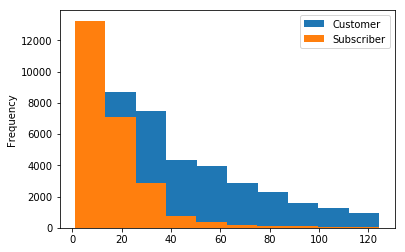

In [11]:
#visualizing grouped by subsciber type
sameStattrips[tripDur < tripDur.quantile(.95)].groupby('usertype')['tripInMinutes'].plot(kind='hist',stacked=True,legend=True)

usertype
Customer      AxesSubplot(0.125,0.125;0.775x0.755)
Subscriber    AxesSubplot(0.125,0.125;0.775x0.755)
Name: tripInMinutes, dtype: object

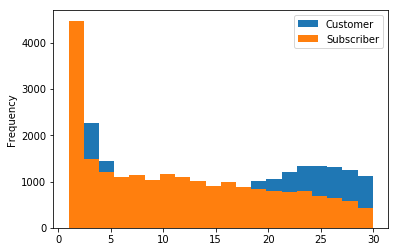

In [12]:
#Charges applied for rides are more for 30 minutes
sameStattrips[sameStattrips['tripInMinutes'] < 30].groupby('usertype')['tripInMinutes'].plot(kind='hist',stacked=True,legend=True,bins=20)

In [13]:
old_count = len(sameStattrips)
sameStattrips = sameStattrips[sameStattrips.tripInMinutes > 3]
new_count = len(sameStattrips)
print('Num records dropped: {}'.format(old_count - new_count))

Num records dropped: 9398


usertype
Customer      AxesSubplot(0.125,0.125;0.775x0.755)
Subscriber    AxesSubplot(0.125,0.125;0.775x0.755)
Name: tripInMinutes, dtype: object

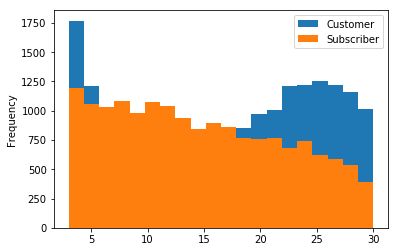

In [14]:
#Charges applied for rides are more for 30 minutes
sameStattrips[sameStattrips['tripInMinutes'] < 30].groupby('usertype')['tripInMinutes'].plot(kind='hist',stacked=True,legend=True,bins=20)

In [15]:
sameStatCountByStatID = sameStattrips.groupby('from_station_id')['trip_id'].agg('count')
sameStatCountByStatID.name = 'numTrips'

In [16]:
sameStatCountsDF = pd.merge(left=ds,right=sameStatCountByStatID.to_frame(),how='outer',left_on='id',right_index=True)
sameStatCountsDF['numTrips'] = sameStatCountsDF['numTrips'].fillna(value=0)
sameStatCountsDF.head(2)

,id,name,latitude,longitude,dpcapacity,online_date,numTrips
0,456,2112 W Peterson Ave,41.991178,-87.683593,15,5/12/2015,6.0
1,101,63rd St Beach,41.781016,-87.576120,23,4/20/2015,137.0


# Visualizing results on Map

In [17]:
def map_points(df,lat_col='latitude',lon_col='longitude',zoom_start=11,plot_points=False,pt_radius=15,draw_heatmap=False,heat_map_weights_col=None,heat_map_weights_normalize=True,heat_map_radius=15):
    middle_lat = df[lat_col].median()
    middle_lon = df[lon_col].median()
    
    curr_map = folium.Map(location=[middle_lat,middle_lon],zoom_start=zoom_start)
    
    #add points to map
    if plot_points:
        for _,row in df.iterrows():
            folium.CircleMarker([row[lat_col],row[lon_col]],radius=pt_radius,popup=row['name'],fill_color="#3db7e4").add_to(curr_map)
            
    
    #adding heatmap
    if draw_heatmap:
        if heat_map_weights_col is None:
            cols_to_pull = [lat_col,lon_col]
        else:
            if heat_map_weights_normalize:
                df[heat_map_weights_col] = df[heat_map_weights_col] / df[heat_map_weights_col].sum()
                
            cols_to_pull = [lat_col,lon_col,heat_map_weights_col]
            
        stations = df[cols_to_pull].as_matrix()
        curr_map.add_children(plugins.HeatMap(stations,radius=heat_map_radius))
        
    
    return curr_map
    

In [18]:
map_points(sameStatCountsDF, plot_points=True, draw_heatmap=True, heat_map_weights_normalize=True,heat_map_weights_col='numTrips')

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
H:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


# Subsciber vs Customer Heatmaps

In [19]:
sameStationCountsByUserTypeStationID = \
    sameStattrips[['from_station_id', 'usertype', 'trip_id']] \
    .groupby(('usertype', 'from_station_id'))\
    .agg('count')

selected = 'Customer'
sameStatCountsDF = pd.merge(left=ds, right=sameStationCountsByUserTypeStationID.loc[selected],
                               how='outer', left_on='id', right_index=True)
sameStatCountsDF['numTrips'] = sameStatCountsDF['trip_id'].fillna(value=0)

map_points(sameStatCountsDF, plot_points=False, draw_heatmap=True,
           heat_map_weights_normalize=False, heat_map_weights_col='numTrips', heat_map_radius=9)

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  This is separate from the ipykernel package so we can avoid doing imports until
H:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
H:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [20]:
selected = 'Subscriber'
sameStatCountsDF = pd.merge(left=ds, right=sameStationCountsByUserTypeStationID.loc[selected],
                               how='outer', left_on='id', right_index=True)
sameStatCountsDF['numTrips'] = sameStatCountsDF['trip_id'].fillna(value=0)

map_points(sameStatCountsDF, plot_points=False, draw_heatmap=True,
           heat_map_weights_normalize=False, heat_map_weights_col='numTrips', heat_map_radius=9)



H:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
H:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


Conclusion

From the maps above, we can see that day pass customers tend to use stations around Lake Michigan and The Loop (Chicago's downtown). This matches up with what I was expecting: that tourists get on a bike to experience Chicago in a different way before continuing with other parts of their trip.

The annual members, on the other hand, have a usage map that is a bit more spread out to the neighborhoods. This could suggest they are running errand before returning their bike to the station where they retrieved it from. I've used Divvy in this manner to pick up take out from a restaurant outside walking distance